# Bank Customer Churn 

## Dataset Information

- RowNumber—corresponds to the record (row) number and has no effect on the output. 
- CustomerId—contains random values and has no effect on customer leaving the bank. 
- Surname—the surname of a customer has no impact on their decision to leave the bank. 
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank. 
- Geography—a customer’s location can affect their decision to leave the bank. 
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank. 
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones. 
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank. 
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances. 
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. 
- IsActiveMember—active customers are less likely to leave the bank. 
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. 
- Exited—whether or not the customer left the bank. 
- Complain—customer has complaint or not. Satisfaction Score—Score provided by the customer for their complaint resolution. 
- Card Type—type of card hold by the customer. 
- Points Earned—the points earned by the customer for using credit card.

In [65]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
df= pd.read_csv("Customer-Churn-Records.csv")

In [68]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [69]:
df.shape

(10000, 18)

In [70]:
len(df.CustomerId.unique())

10000

In [71]:
df.isnull().sum() # There are no missing values 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [72]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [73]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [74]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

### Correlation between variables 

<AxesSubplot: >

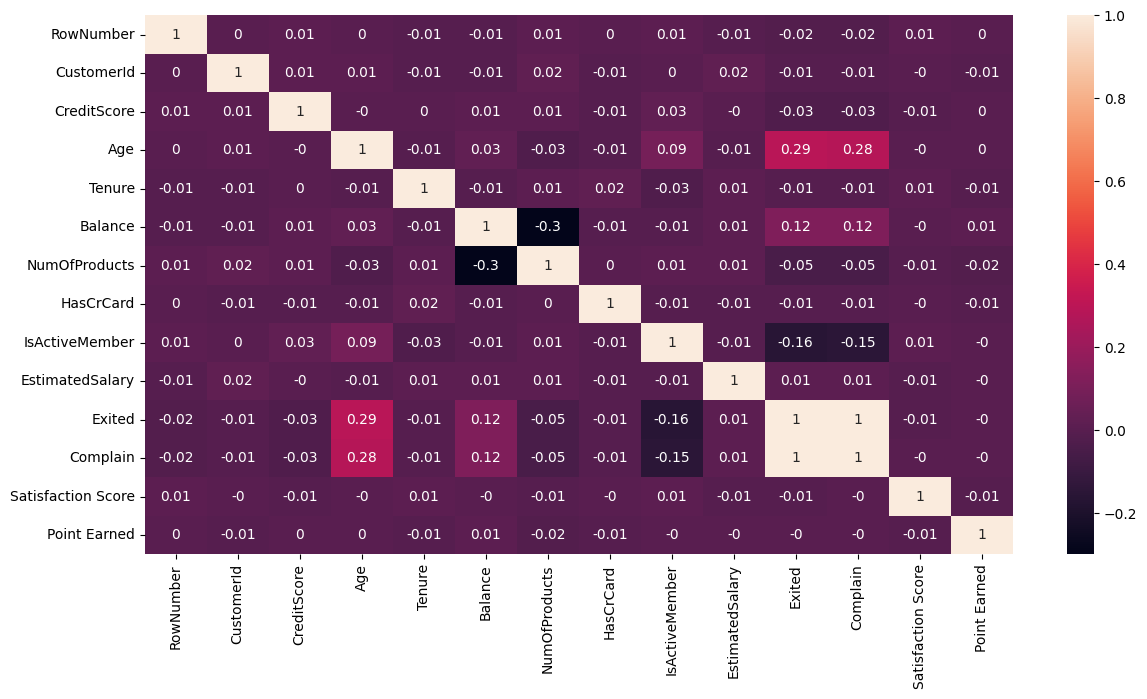

In [75]:
df_corr = df.corr().round(2)
plt.figure(figsize=(14,7))
sns.heatmap(data=df_corr, annot=True)

- We can see that there is 100% correlation between the variable complain and the target variable Exited. So we will delete the Complain variable
- We can also see that the age, if the member is active or not, and the balance are the most correlated to the target variable 

In [76]:
df= df.drop("Complain", axis = 1)

### Graphical Analysis 

#### Categorical Variables 

<AxesSubplot: title={'center': 'Card Type'}, xlabel='Card Type', ylabel='count'>

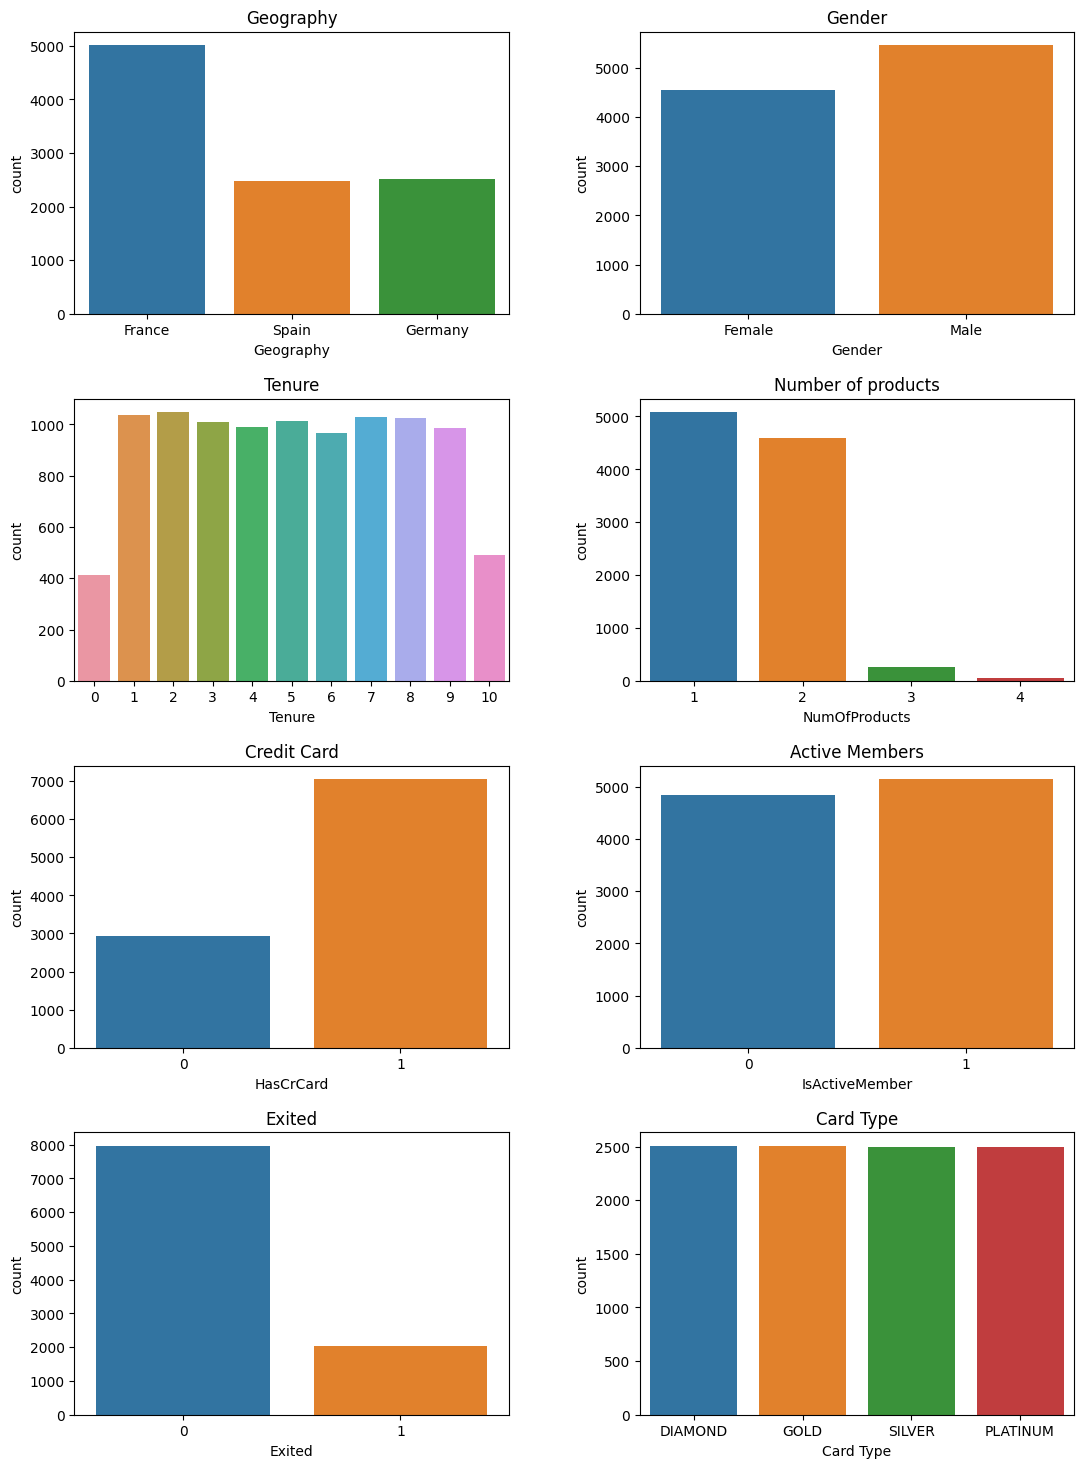

In [77]:
plt.figure(figsize=(20,25))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.6,
                    top=0.8,
                    wspace=0.3, 
                    hspace=0.3)

plt.subplot(5, 2, 1)
plt.title("Geography")
sns.countplot(data=df, x = "Geography")

plt.subplot(5, 2, 2)
plt.title("Gender")
sns.countplot(data=df, x = "Gender")

plt.subplot(5, 2, 3)
plt.title("Tenure")
sns.countplot(data=df, x = "Tenure")

plt.subplot(5, 2, 4)
plt.title("Number of products")
sns.countplot(data=df, x = "NumOfProducts")

plt.subplot(5, 2, 5)
plt.title("Credit Card")
sns.countplot(data=df, x = "HasCrCard")

plt.subplot(5, 2, 6)
plt.title("Active Members")
sns.countplot(data=df, x = "IsActiveMember")

plt.subplot(5, 2, 7)
plt.title("Exited")
sns.countplot(data=df, x = "Exited")

plt.subplot(5, 2, 8)
plt.title("Card Type")
sns.countplot(data=df, x = "Card Type")

#### Continous variables 

In [78]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

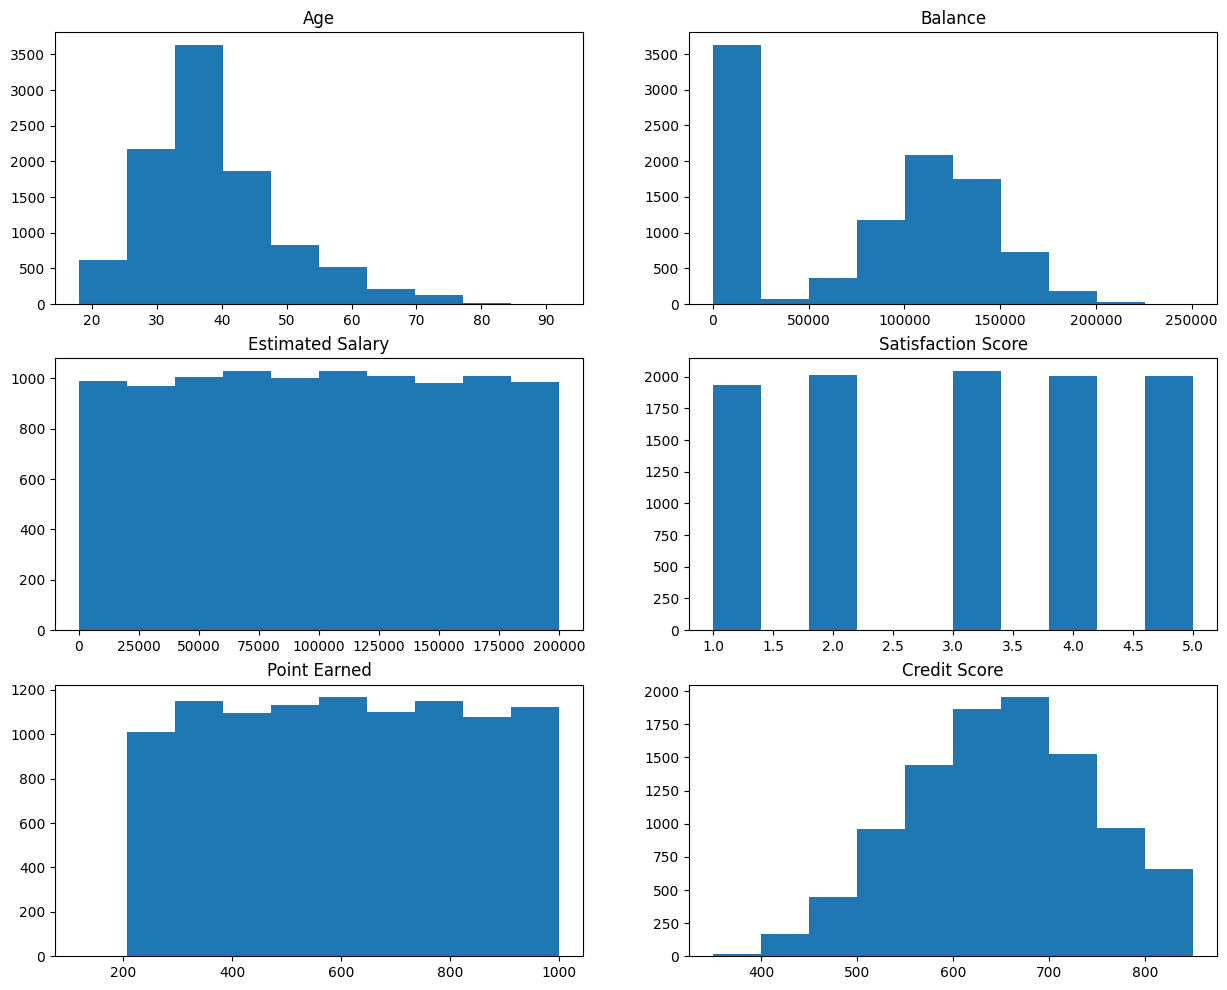

In [79]:
plt.figure(figsize = (15,12))


plt.subplot(3,2,1)
plt.title("Age")
plt.hist(df.Age)

plt.subplot(3,2,2)
plt.title("Balance")
plt.hist(df.Balance)

plt.subplot(3,2,3)
plt.title("Estimated Salary")
plt.hist(df.EstimatedSalary)

plt.subplot(3,2,4)
plt.title("Satisfaction Score")
plt.hist(df["Satisfaction Score"])

plt.subplot(3,2,5)
plt.title("Point Earned")
plt.hist(df["Point Earned"])


plt.subplot(3,2,6)
plt.title("Credit Score")
plt.hist(df["CreditScore"])

- Looking at the continous variables we can see that most of the variables are well balanced, the variable Estimated Salary has practically the same number of people for each salary range. 
- When lookint at the Balance variable we can see that most people in our dataset do not have money in their account, and for the people who have money, the balance is well balanced.

### Outliars Analysis 

In [80]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


<AxesSubplot: xlabel='Point Earned'>

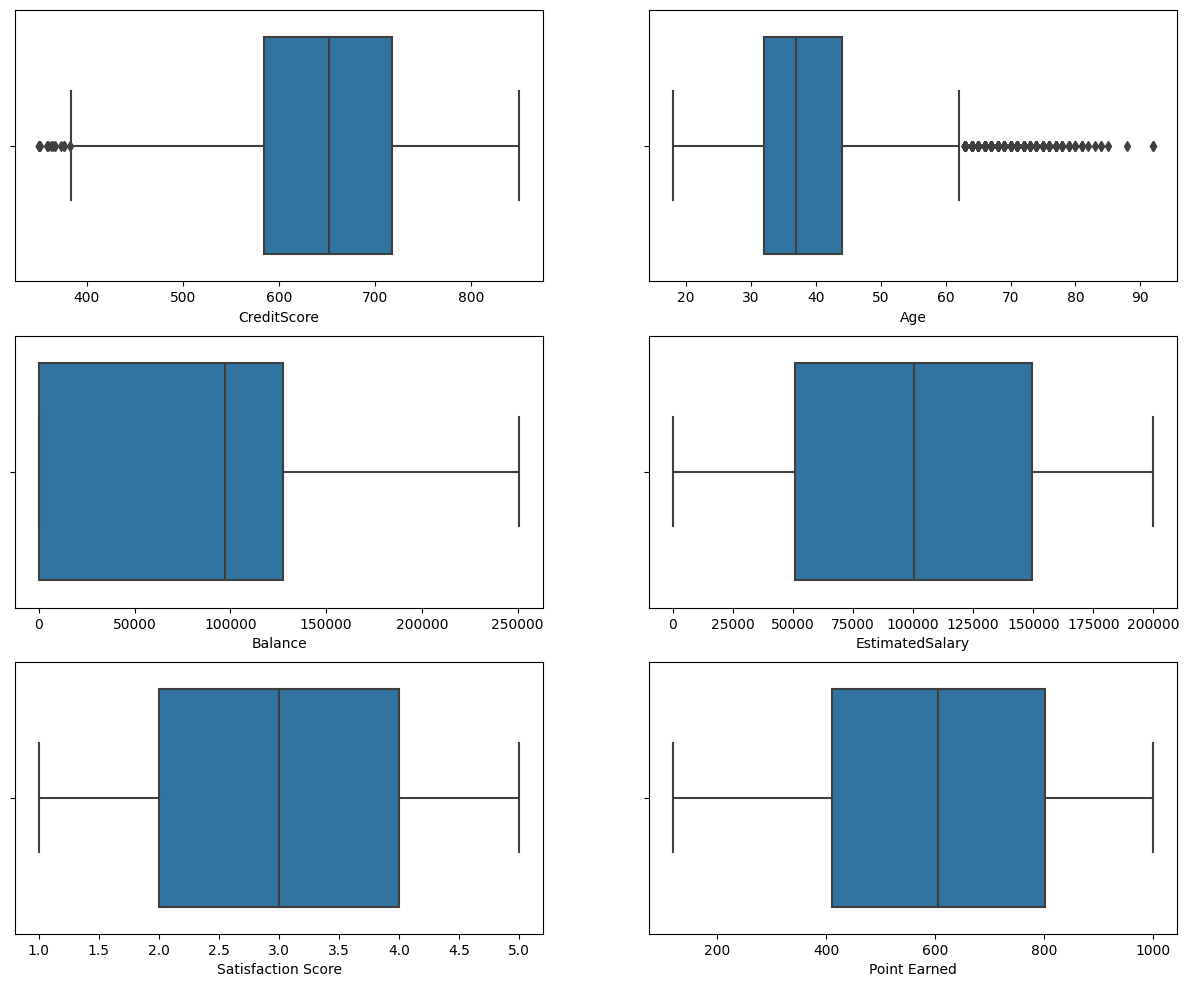

In [81]:
plt.figure(figsize = (15,12))

plt.subplot(3,2,1)
sns.boxplot(data=df, x= df.CreditScore)

plt.subplot(3,2,2)
sns.boxplot(data=df, x= df.Age)

plt.subplot(3,2,3)
sns.boxplot(data=df, x= df.Balance)

plt.subplot(3,2,4)
sns.boxplot(data=df, x= df.EstimatedSalary)

plt.subplot(3,2,5)
sns.boxplot(data=df, x= df["Satisfaction Score"])


plt.subplot(3,2,6)
sns.boxplot(data=df, x= df["Point Earned"])

- In the Credit Score and Age BoxPlots we see some outliars, but for now we will leave them. 

#### Bivariate Analysis 

In [82]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


<AxesSubplot: title={'center': 'Card Type'}, xlabel='Card Type', ylabel='count'>

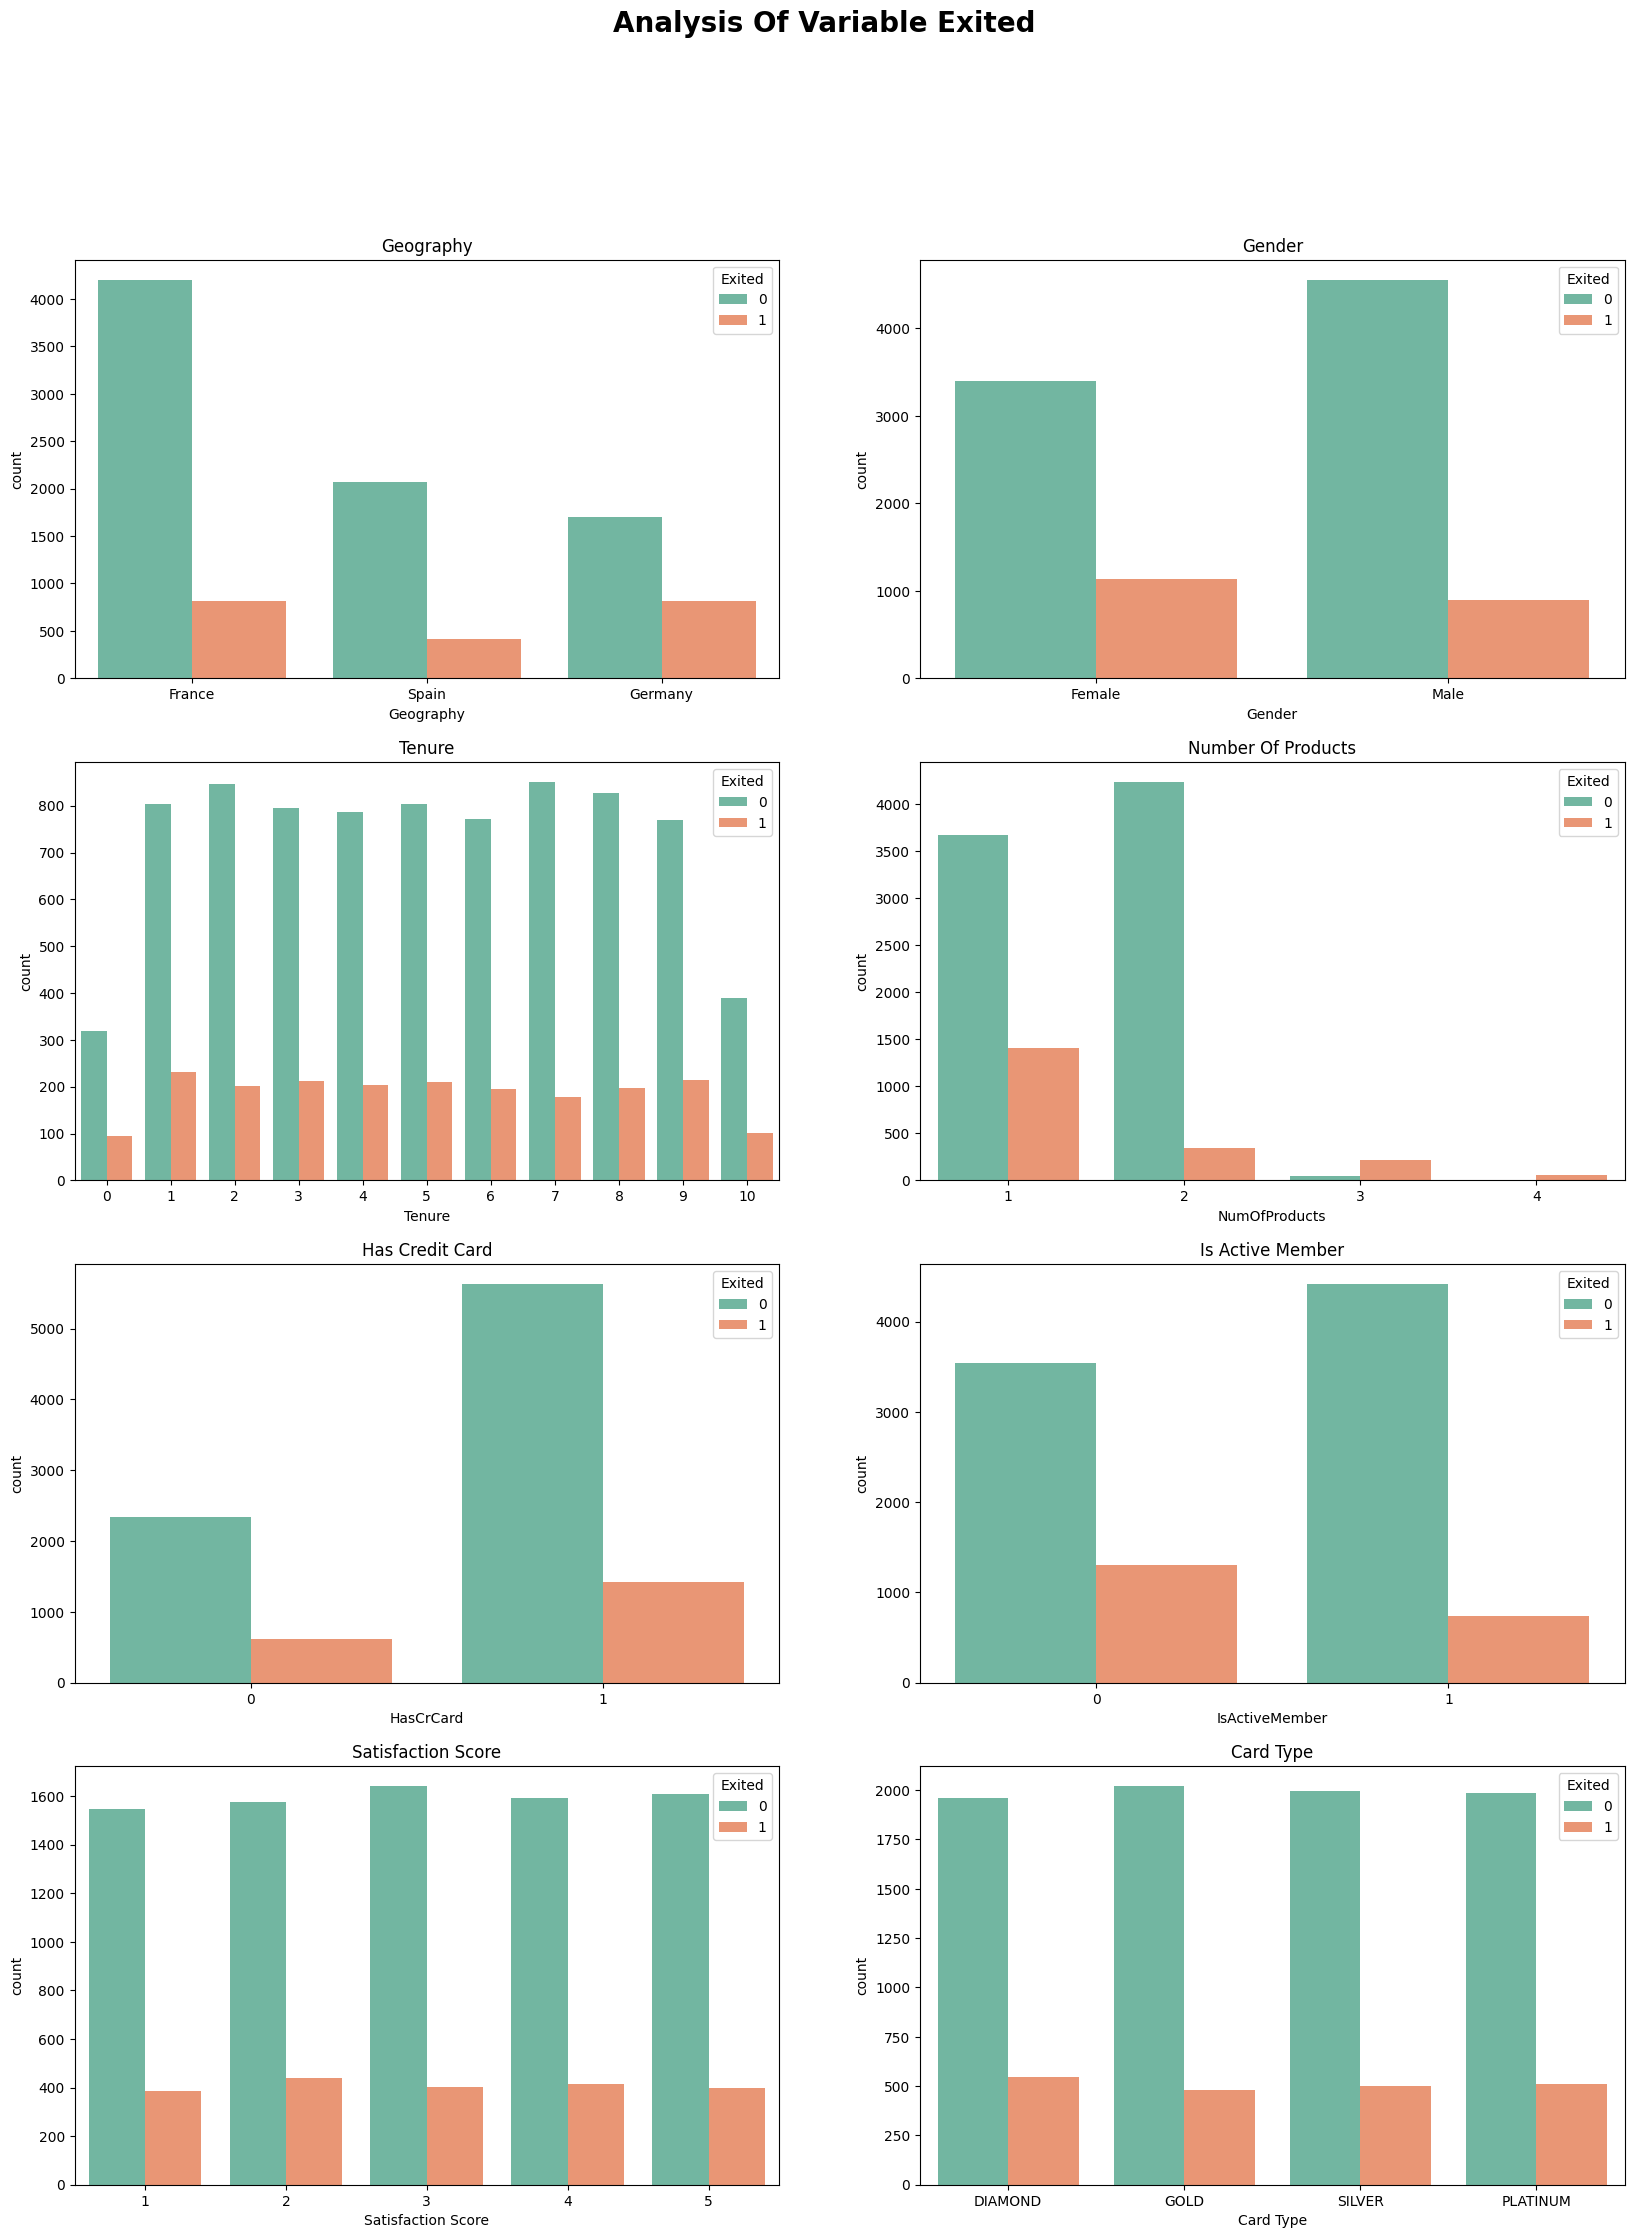

In [83]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.title('Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.title('Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.title('Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.title('Number Of Products')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.title('Has Credit Card')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.title('Is Active Member')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.title('Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.title('Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

- Upon analyzing the categorical variables in relation to the target variable, it seems that the behavior across different categories does not exhibit any significant differences. The distribution of values appears to be relatively consistent between positive and negative outcomes.
-  It's possible that when considering multiple variables together, new patterns or associations could emerge that were not apparent in the bivariate analysis alone.

In [84]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


<AxesSubplot: xlabel='Exited', ylabel='Point Earned'>

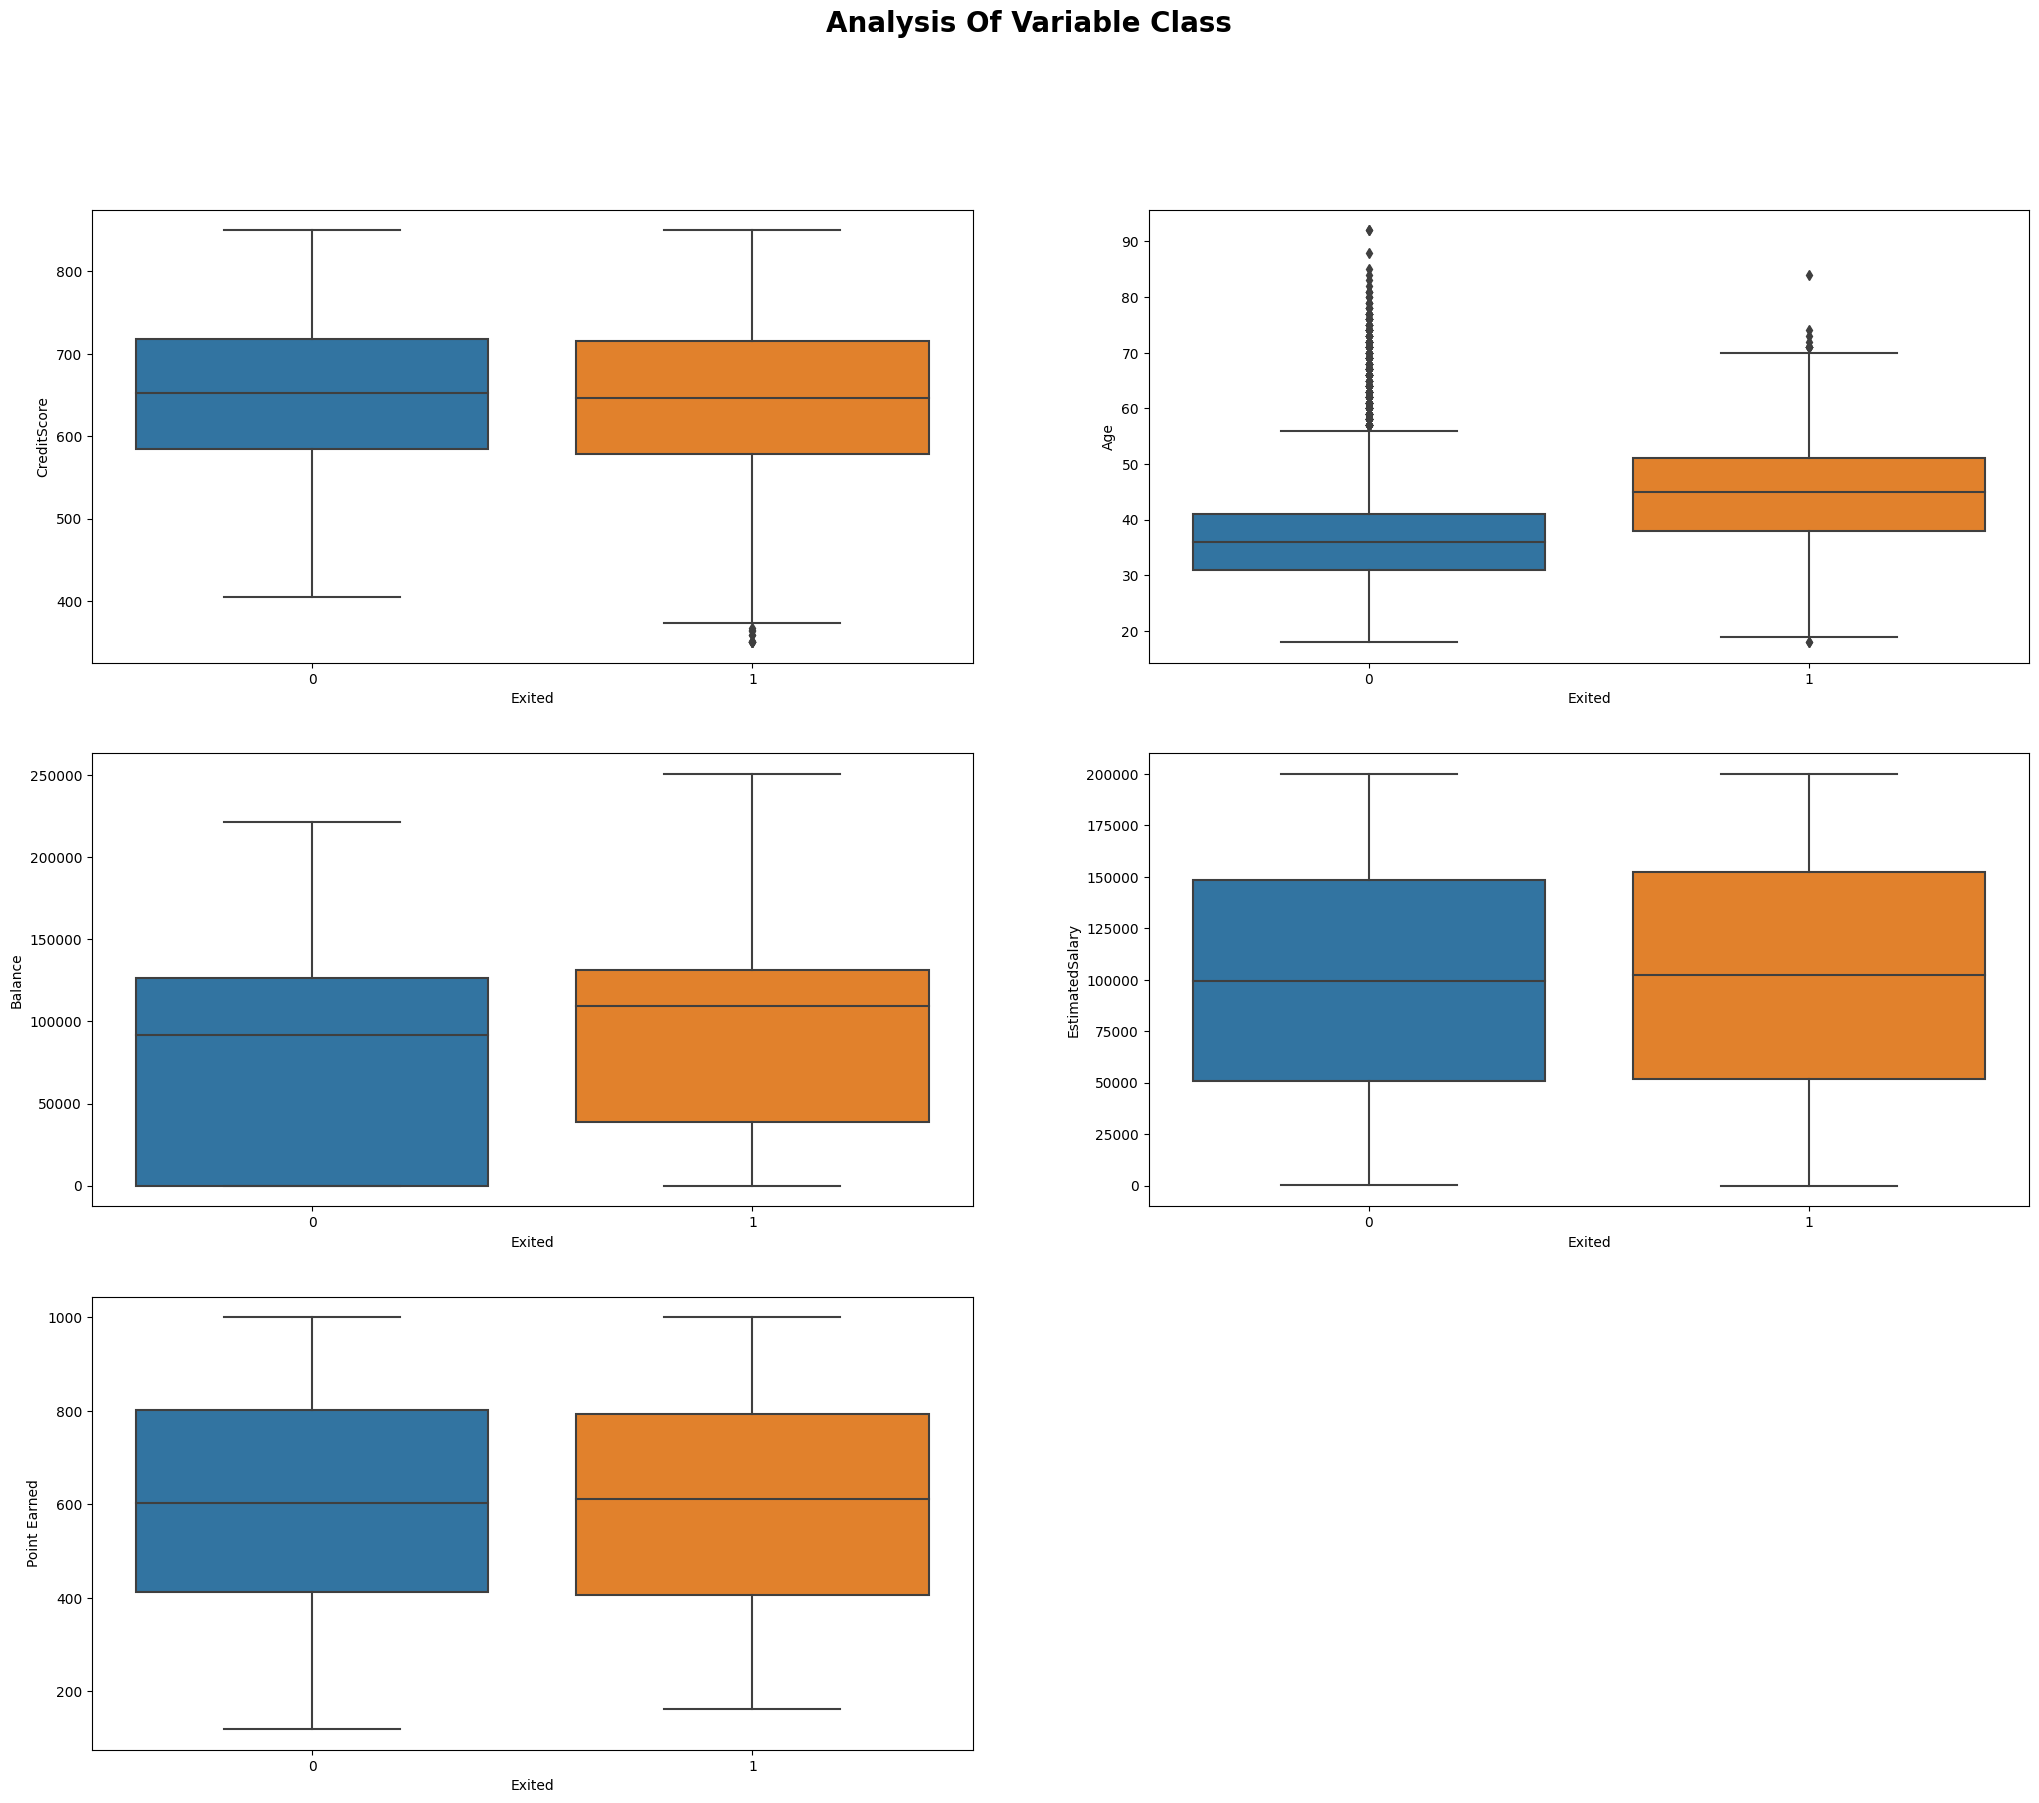

In [85]:

plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

- It is interesant to see that older customers are more likely to leave the bank. 

### Preprocessing the data

In [114]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [142]:
# df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [116]:
X = df.drop("Exited", axis=1)
y = df.Exited

In [117]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(X, y, test_size=0.3, random_state = 42)


In [118]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

## Machine Learning Models 

### Logistic Regression 

In [120]:
#Train the model 
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(train_data_scaled, train_target)


LogisticRegression()

In [121]:
#Predictions on the test set 
predictions_lr = model_lr.predict(test_data_scaled)

In [122]:
#Model evaluation 
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y_true = test_target, y_pred= predictions_lr)
print("Accuracy LogisticRegression: ", accuracy_lr)

Accuracy LogisticRegression:  0.814


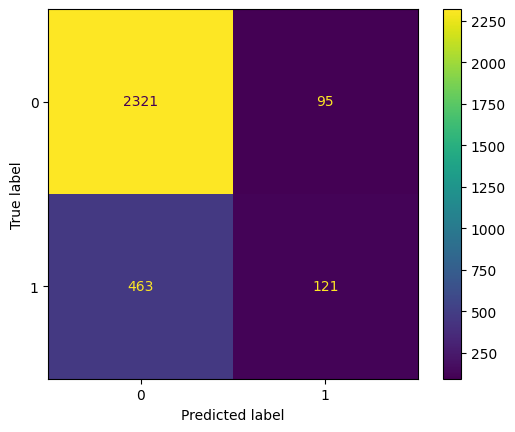

In [123]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true = test_target, y_pred=predictions_lr)
CM = ConfusionMatrixDisplay(cm)
CM.plot();

In [124]:
# Evaluation metrics

# Accuracy: (TN + TP) / (TN + FP + FN + TP) = (2321 + 121) / (2321 + 95 + 463 + 121) ≈ 0.816

from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
# Precision: TP / (TP + FP) = 121 / (121 + 95) ≈ 0.560 # The proportion of correctly predicted exits among all predicted exits.
precision = precision_score(test_target, predictions_lr)
print("Precision:", precision)

# Calculate recall
#Recall (also known as sensitivity or true positive rate): TP / (TP + FN) = 121 / (121 + 463) ≈ 0.207 # The proportion of correctly predicted exits among all actual exits.
recall = recall_score(test_target, predictions_lr)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(test_target, predictions_lr)
print("F1-score:", f1)

Precision: 0.5601851851851852
Recall: 0.2071917808219178
F1-score: 0.3025


## Decision Tree Classifier 

In [125]:
# Train the model 
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X= train_data_scaled, y = train_target)

DecisionTreeClassifier()

In [126]:
# Predictions on the test Set 
predictions_dt = model_dt.predict(X = test_data_scaled)

In [127]:
#Model evaluation 
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_true=test_target, y_pred = predictions_dt)
print("Accuracy Decision Tree Classifier: ", accuracy_dt)

Accuracy Decision Tree Classifier:  0.7896666666666666


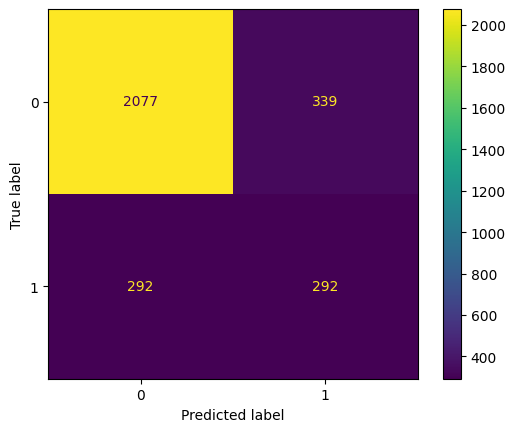

In [128]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=test_target, y_pred = predictions_dt)
CM = ConfusionMatrixDisplay(cm)
CM.plot()

In [129]:
# Evaluation metrics

# Accuracy: (TN + TP) / (TN + FP + FN + TP) = (2080 + 296) / (2080 + 288 + 336 + 296) ≈ 0.792


from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
# Precision: TP / (TP + FP) = 296 / (296 + 336) ≈ 0.468 # The proportion of correctly predicted exits among all predicted exits.
precision = precision_score(test_target, predictions_dt)
print("Precision:", precision)

# Calculate recall
#Recall (also known as sensitivity or true positive rate): TP / (TP + FN) = 296 / (296 + 288) ≈ 0.506 # The proportion of correctly predicted exits among all actual exits.
recall = recall_score(test_target, predictions_dt)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(test_target, predictions_dt)
print("F1-score:", f1)

Precision: 0.46275752773375595
Recall: 0.5
F1-score: 0.4806584362139918


## Support Vector Classifier 

In [130]:
#Train the model 
from sklearn.svm import SVC
model_sv = SVC()
model_sv.fit(X= train_data_scaled, y= train_target)

SVC()

In [131]:
# Predictions on the test set
predictions_sv = model_sv.predict(test_data_scaled)

In [132]:
# Model evaluation 
from sklearn.metrics import accuracy_score
accuracy_sv = accuracy_score(y_true = test_target, y_pred = predictions_sv)
print("Accuracy Support Vector Classifier: ", accuracy_sv)

Accuracy Support Vector Classifier:  0.8633333333333333


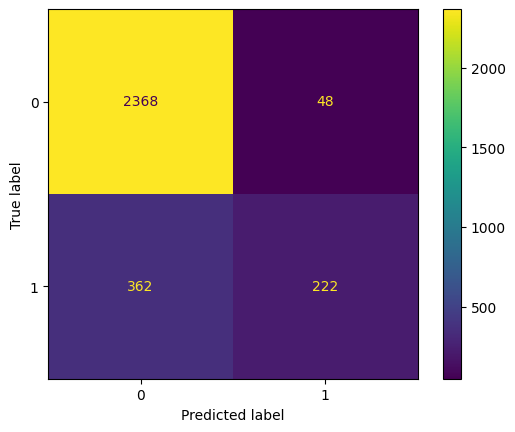

In [133]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=test_target, y_pred = predictions_sv)
CM = ConfusionMatrixDisplay(cm)
CM.plot()

In [134]:
# Evaluation metrics

# Accuracy: (TN + TP) / (TN + FP + FN + TP) = (2368 + 222) / (2368 + 48 + 362 + 222) ≈ 0.863


from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
# Precision: TP / (TP + FP) = 222 / (222 + 48) ≈ 0.822 # The proportion of correctly predicted exits among all predicted exits.
precision = precision_score(test_target, predictions_sv)
print("Precision:", precision)

# Calculate recall
#Recall (also known as sensitivity or true positive rate): TP / (TP + FN) = 222 / (222 + 362) ≈ 0.3801 # The proportion of correctly predicted exits among all actual exits.
recall = recall_score(test_target, predictions_sv)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(test_target, predictions_sv)
print("F1-score:", f1)

Precision: 0.8222222222222222
Recall: 0.3801369863013699
F1-score: 0.5199063231850117


## Random Forest Classifier 

In [135]:
# Train the model 
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X= train_data_scaled, y= train_target)

RandomForestClassifier()

In [136]:
# Predictions on the test set 
predictions_rf = model_rf.predict(test_data_scaled)

In [137]:
#Model Evaluation 
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_true = test_target, y_pred = predictions_rf)
print("Accuracy Random Forest Classifier: ", accuracy_rf)

Accuracy Random Forest Classifier:  0.8696666666666667


In [138]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

- Based on the accuracy of 0.867 that we obtained without using grid search, it appears that the random forest classifier is already performing reasonably well. The accuracy of 0.867 suggests that the model is correctly predicting the class labels for approximately 86.7% of the instances in the test set.
- We have tried Grid search and was very time-consuming, so It is reasonable to proceed with our project without further hyperparameter tuning

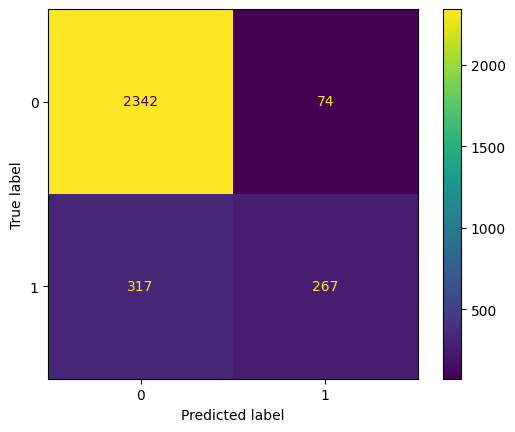

In [139]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=test_target, y_pred = predictions_rf)
CM = ConfusionMatrixDisplay(cm)
CM.plot()

In [140]:
# Evaluation metrics

# Accuracy: (TN + TP) / (TN + FP + FN + TP) = (2336 + 265) / (2336 + 80 + 319 + 265) ≈ 0.867


from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
# Precision: TP / (TP + FP) = 265 / (265 + 80) ≈ 0.768 # The proportion of correctly predicted exits among all predicted exits.
precision = precision_score(test_target, predictions_rf)
print("Precision:", precision)

# Calculate recall
#Recall (also known as sensitivity or true positive rate): TP / (TP + FN) = 265 / (265 + 319) ≈ 0.453 # The proportion of correctly predicted exits among all actual exits.
recall = recall_score(test_target, predictions_rf)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(test_target, predictions_rf)
print("F1-score:", f1)

Precision: 0.782991202346041
Recall: 0.4571917808219178
F1-score: 0.5772972972972973


### XGBoost

In [145]:
# !pip install xgboost

     --------------------------------------- 70.9/70.9 MB 16.0 MB/s eta 0:00:00


In [150]:
# Train the model 
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X= train_data_scaled, y=train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [153]:
# Predictions on the test set 
predictions_xgb = model_xgb.predict(test_data_scaled)

In [154]:
#Model Evaluation 
from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_true = test_target, y_pred = predictions_xgb)
print("Accuracy XGBClassifier: ", accuracy_rf)

Accuracy XGBClassifier:  0.8696666666666667


In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
model_xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>

In [158]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300]
}


In [160]:
model_xgb_GS = GridSearchCV(model_xgb,param_grid)

In [161]:
model_xgb_GS.fit(train_data_scaled, train_target)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]})

In [162]:
# Predictions on the test set 
predictions_xgb_GS = model_xgb_GS.predict(test_data_scaled)

In [163]:
accuracy_xgb_GS = accuracy_score(y_true = test_target, y_pred = predictions_xgb_GS)
print("Accuracy XGBClassifier: ", accuracy_rf)

Accuracy XGBClassifier:  0.8696666666666667
